In [19]:
pip install --upgrade category_encoders

In [20]:
conda install graphviz

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\bizyan\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.12.12 |       haa95532_0         127 KB
    scikit-learn-1.3.0         |  py311hf62ec03_1         8.1 MB
    ------------------------------------------------------------
                                           Total:         8.3 MB

The following NEW packages will be INSTALLED:

  scikit-learn       pkgs/main/win-64::scikit-learn-1.3.0-py311hf62ec03_1 

The following packages will be UPDATED:

  ca-certificates                     2023.08.22-haa95532_0 --> 2023.12.12-haa95532_0 




scikit-learn-1.3.0   | 8.1 MB    |            |   0% 

ca-certificates-2023 | 127 KB    |            |   0% 

ca-certificates-2023 | 127 KB    | #2


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::imbalanced-learn==0.10.1=py311haa95532_1
  - defaults/win-64::scikit-learn-intelex==2023.1.1=py311haa95532_0
  - defaults/win-64::_anaconda_depends==2023.09=py311_mkl_1


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [21]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [369]:
pip install tabulate

In [26]:
pip install scikit-learn-intelex

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
import warnings

warnings.filterwarnings('ignore')

In [16]:
#Loading the dataset
df = pd.read_csv('C:/Users/bizyan/Desktop/Project/Dataset/FCT.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31164 entries, 0 to 31163
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Wafer    31164 non-null  int64  
 1   V1       31017 non-null  float64
 2   V2       31017 non-null  float64
 3   V3       31017 non-null  float64
 4   V4       30989 non-null  float64
 5   V5       30989 non-null  float64
 6   V6       30989 non-null  float64
 7   V7       30989 non-null  float64
 8   V8       30989 non-null  float64
 9   V9       30988 non-null  float64
 10  V10      30988 non-null  float64
 11  V11      30988 non-null  float64
 12  V12      30988 non-null  float64
 13  V13      30988 non-null  float64
 14  V14      30988 non-null  float64
 15  V15      30938 non-null  float64
 16  Process  31164 non-null  object 
dtypes: float64(15), int64(1), object(1)
memory usage: 4.0+ MB


In [18]:
df.describe()

Wafer            V1            V2            V3            V4  \
count  31164.000000  31017.000000  31017.000000  31017.000000  30989.000000   
mean      12.997529      0.000021      0.000040      1.754271      0.014888   
std        7.211047      0.000050      0.000055      0.076243      0.000690   
min        1.000000      0.000019      0.000038     -0.001653      0.010112   
25%        7.000000      0.000020      0.000038      1.717485      0.014428   
50%       13.000000      0.000020      0.000039      1.757451      0.014806   
75%       19.000000      0.000020      0.000039      1.794378      0.015256   
max       25.000000      0.002036      0.002037      1.989441      0.019286   

                 V5            V6            V7            V8            V9  \
count  30989.000000  30989.000000  30989.000000  3.098900e+04  30988.000000   
mean       0.026322      0.843638      0.000185  6.624956e-10      2.469925   
std        0.003883      0.028148      0.000017  1.176261e-08      0.064963   
min        0.010607      0.722746      0.000127  7.080000e-13      2.298055   
25%        0.022724      0.817863      0.000172  2.620000e-10      2.425168   
50%        0.027640      0.852733      0.000183  5.480000e-10      2.472281   
75%        0.029166      0.864484      0.000196  9.160000e-10      2.514739   
max        0.041853      0.964146      0.000244  2.070000e-06      2.738558   

                V10           V11           V12           V13           V14  \
count  30988.000000  30988.000000  30988.000000  30988.000000  3.098800e+04   
mean       0.446985      0.000054   8329.605446     94.946307  5.973368e-09   
std        0.080519      0.000009    360.829464      1.841294  8.215896e-08   
min        0.284959      0.000033   6929.750000     30.650070  4.600000e-10   
25%        0.382283      0.000046   8078.074500     93.750580  2.180000e-09   
50%        0.401218      0.000050   8329.685500     95.219540  2.700000e-09   
75%        0.534567      0.000062   8575.882000     96.311450  3.140000e-09   
max        0.635663      0.000081   9913.676000     98.023990  2.160000e-06   

                V15  
count  3.093800e+04  
mean   9.451281e-10  
std    3.577533e-10  
min    3.900000e-12  
25%    8.000000e-10  
50%    9.640000e-10  
75%    1.110000e-09  
max    1.330000e-08

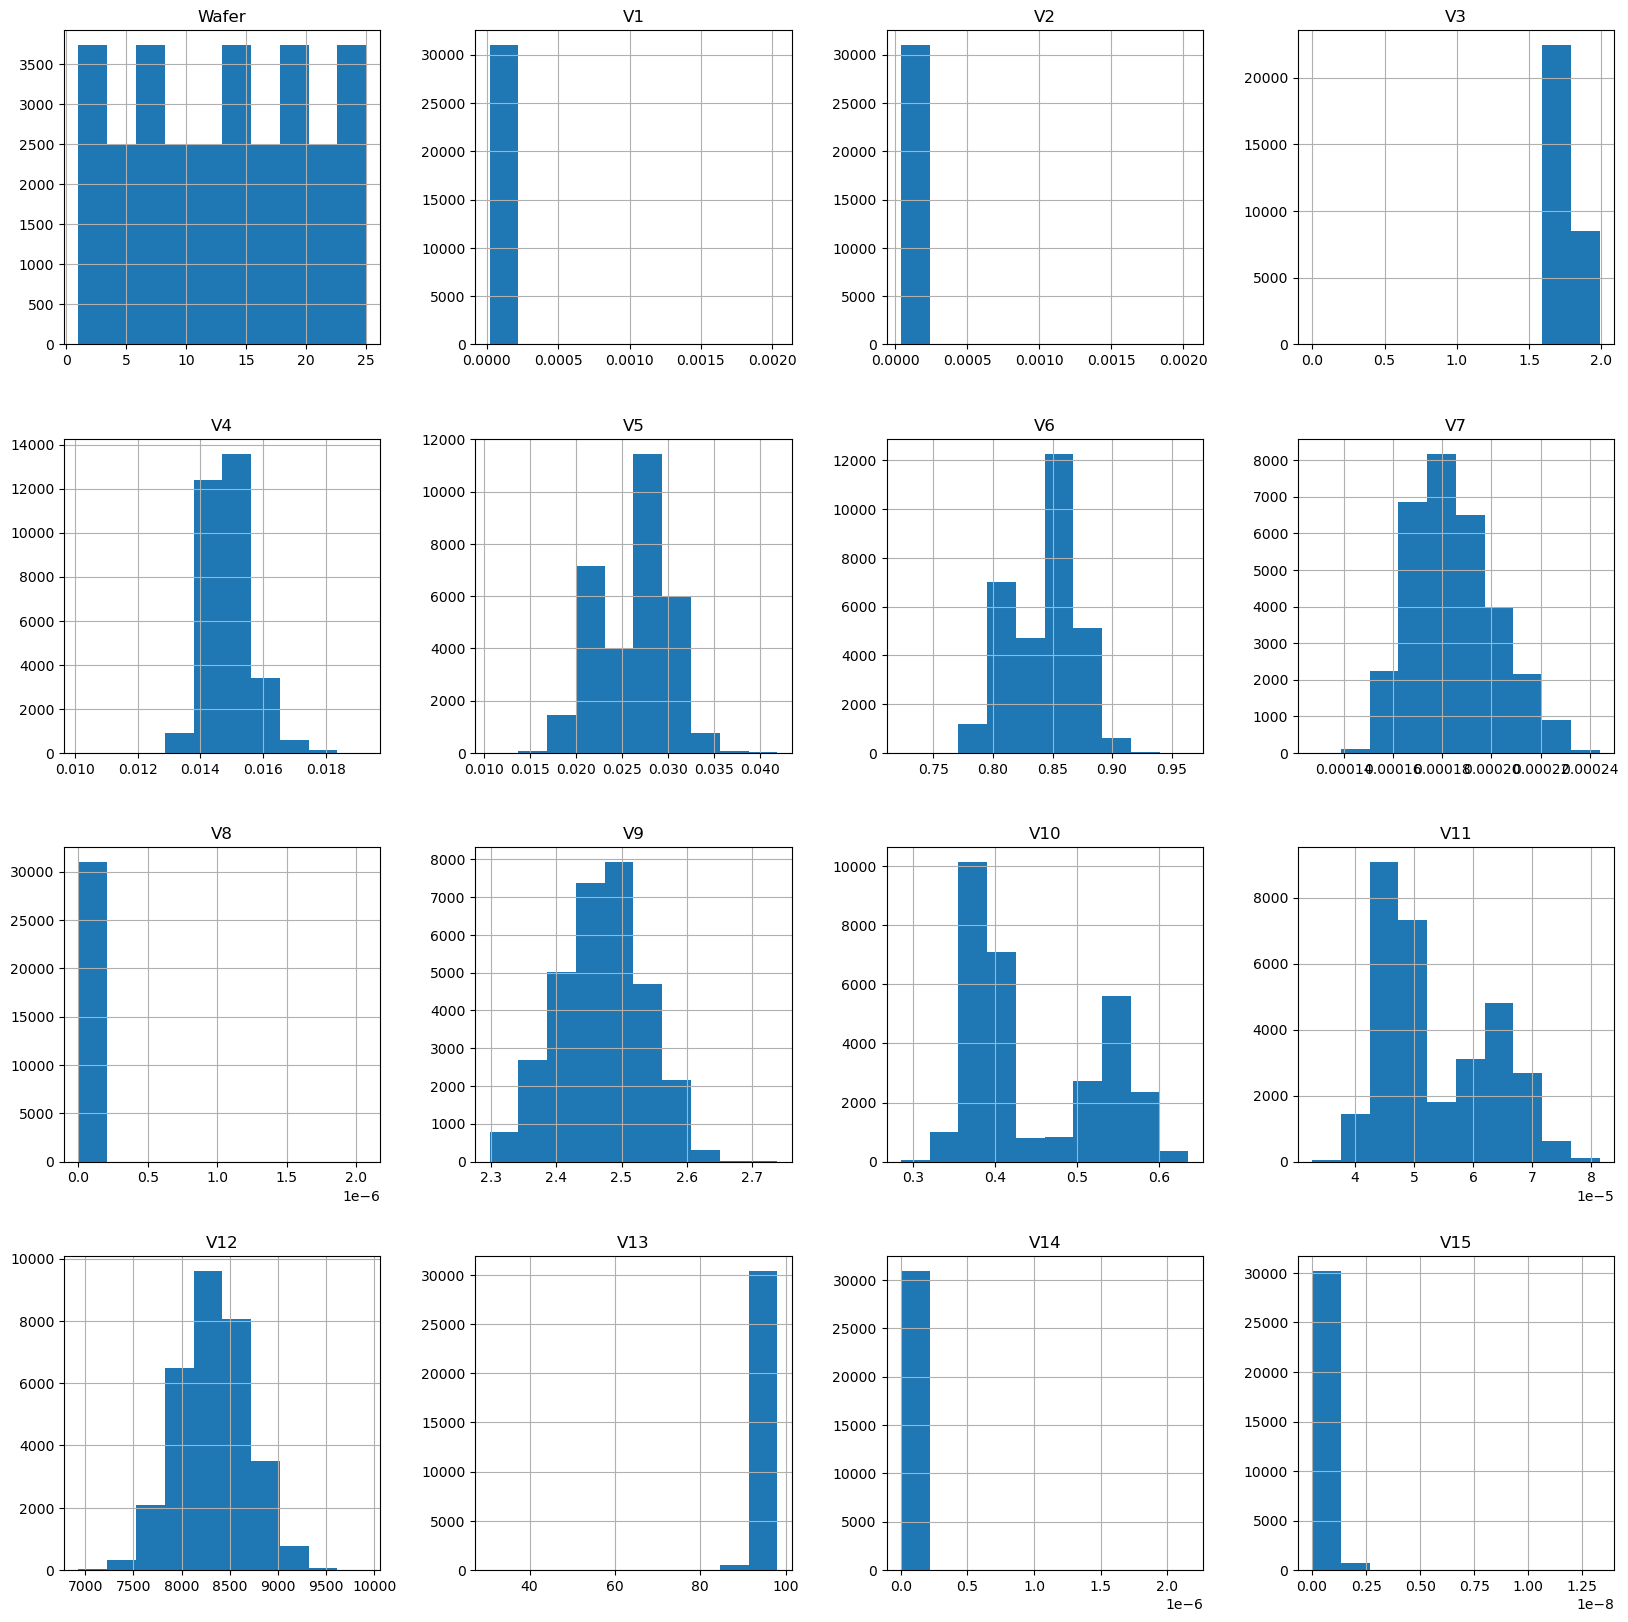

In [19]:
#to plot histogram before data fillings
df_histo = df.hist(figsize = (20,20))
plt.savefig('df histo.jpg')

In [20]:
#to check NaN count for each rows
df.isnull().sum()

Wafer        0
V1         147
V2         147
V3         147
V4         175
V5         175
V6         175
V7         175
V8         175
V9         176
V10        176
V11        176
V12        176
V13        176
V14        176
V15        226
Process      0
dtype: int64

In [21]:
#to define another df for NAN fillings
df_copy = df.copy(deep = True)

In [22]:
#to replace NaN rows into median for each columns
df_copy['V1'].fillna(df_copy['V1'].median(), inplace = True)
df_copy['V2'].fillna(df_copy['V2'].median(), inplace = True)
df_copy['V3'].fillna(df_copy['V3'].median(), inplace = True)
df_copy['V4'].fillna(df_copy['V4'].median(), inplace = True)
df_copy['V5'].fillna(df_copy['V5'].median(), inplace = True)
df_copy['V6'].fillna(df_copy['V6'].median(), inplace = True)
df_copy['V7'].fillna(df_copy['V7'].median(), inplace = True)
df_copy['V8'].fillna(df_copy['V8'].median(), inplace = True)
df_copy['V9'].fillna(df_copy['V9'].median(), inplace = True)
df_copy['V10'].fillna(df_copy['V10'].median(), inplace = True)
df_copy['V11'].fillna(df_copy['V11'].median(), inplace = True)
df_copy['V12'].fillna(df_copy['V12'].median(), inplace = True)
df_copy['V13'].fillna(df_copy['V13'].median(), inplace = True)
df_copy['V14'].fillna(df_copy['V14'].median(), inplace = True)
df_copy['V15'].fillna(df_copy['V15'].median(), inplace = True)

In [23]:
#to check NaN count for each rows
df_copy.isnull().sum()

Wafer      0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
Process    0
dtype: int64

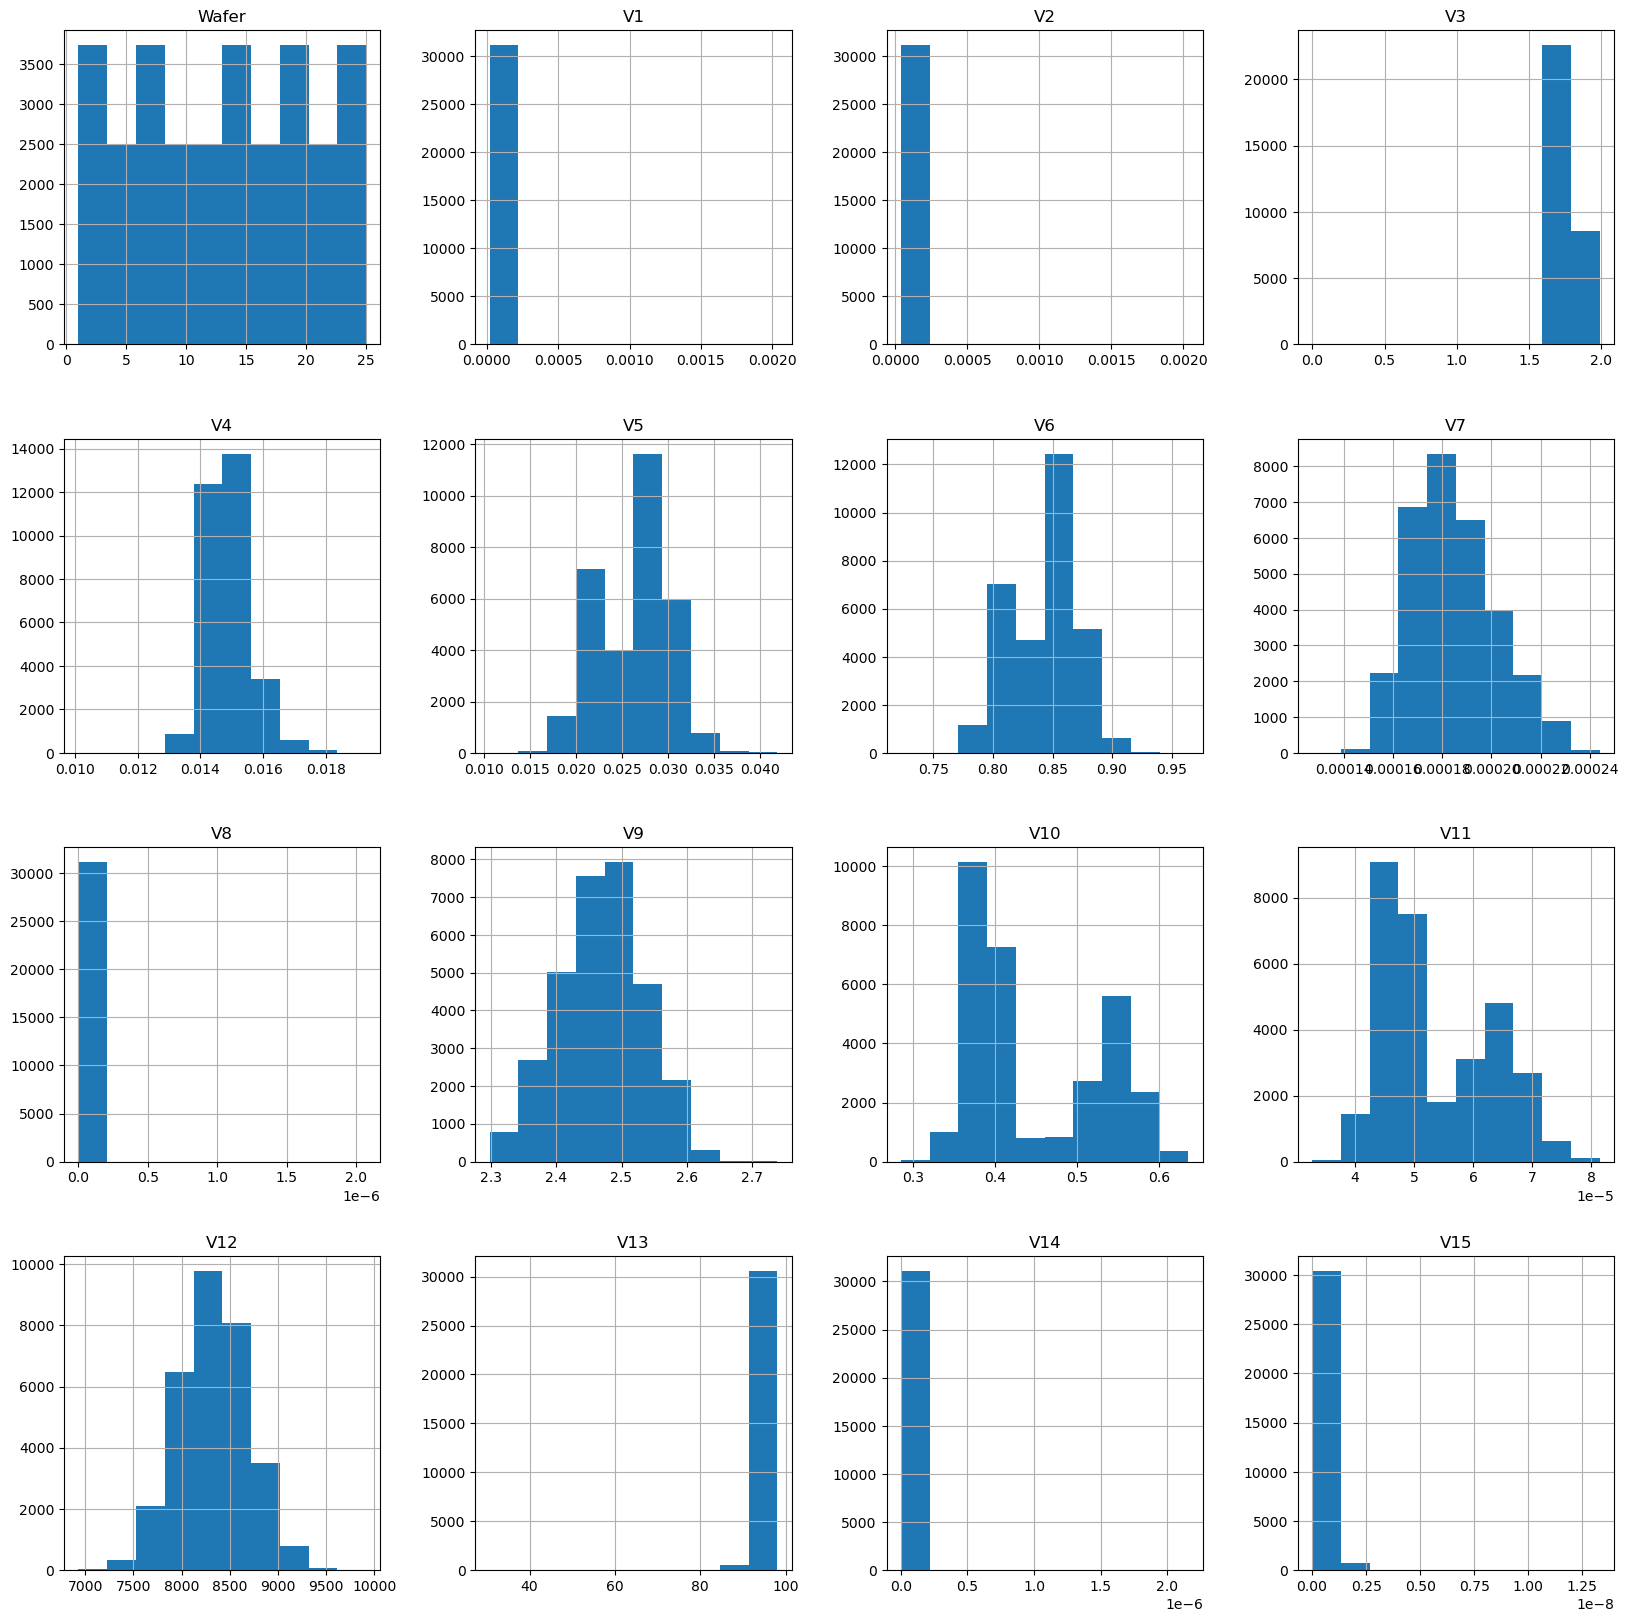

In [24]:
#to plot histogram after data fillings
df_copy.hist(figsize = (20,20))
plt.savefig('df histo.jpg')

In [25]:
#saving csv file to R for hypothesis testing in JMP
df_copy.to_csv('chip_data_updated.csv', index=False)

In [26]:
#Annova one way test shows X,Y,V1,V2,V8, p>0.05. therfore we will drop these columns
df=df_copy.drop(['Wafer','V1','V2','V8'], axis=1)

In [27]:
df.describe()

V3            V4            V5            V6            V7  \
count  31164.000000  31164.000000  31164.000000  31164.000000  31164.000000   
mean       1.754286      0.014887      0.026330      0.843690      0.000185   
std        0.076063      0.000688      0.003873      0.028078      0.000017   
min       -0.001653      0.010112      0.010607      0.722746      0.000127   
25%        1.717756      0.014431      0.022744      0.817982      0.000172   
50%        1.757451      0.014806      0.027640      0.852733      0.000183   
75%        1.794245      0.015253      0.029158      0.864413      0.000196   
max        1.989441      0.019286      0.041853      0.964146      0.000244   

                 V9           V10           V11           V12           V13  \
count  31164.000000  31164.000000  31164.000000  31164.000000  31164.000000   
mean       2.469938      0.446727      0.000054   8329.605898     94.947850   
std        0.064779      0.080365      0.000009    359.809089      1.836201   
min        2.298055      0.284959      0.000033   6929.750000     30.650070   
25%        2.425410      0.382367      0.000046   8079.664750     93.757540   
50%        2.472281      0.401218      0.000050   8329.685500     95.219540   
75%        2.514493      0.534290      0.000062   8574.099500     96.307690   
max        2.738558      0.635663      0.000081   9913.676000     98.023990   

                V14           V15  
count  3.116400e+04  3.116400e+04  
mean   5.954881e-09  9.452649e-10  
std    8.192700e-08  3.564572e-10  
min    4.600000e-10  3.900000e-12  
25%    2.190000e-09  8.010000e-10  
50%    2.700000e-09  9.640000e-10  
75%    3.130000e-09  1.100000e-09  
max    2.160000e-06  1.330000e-08

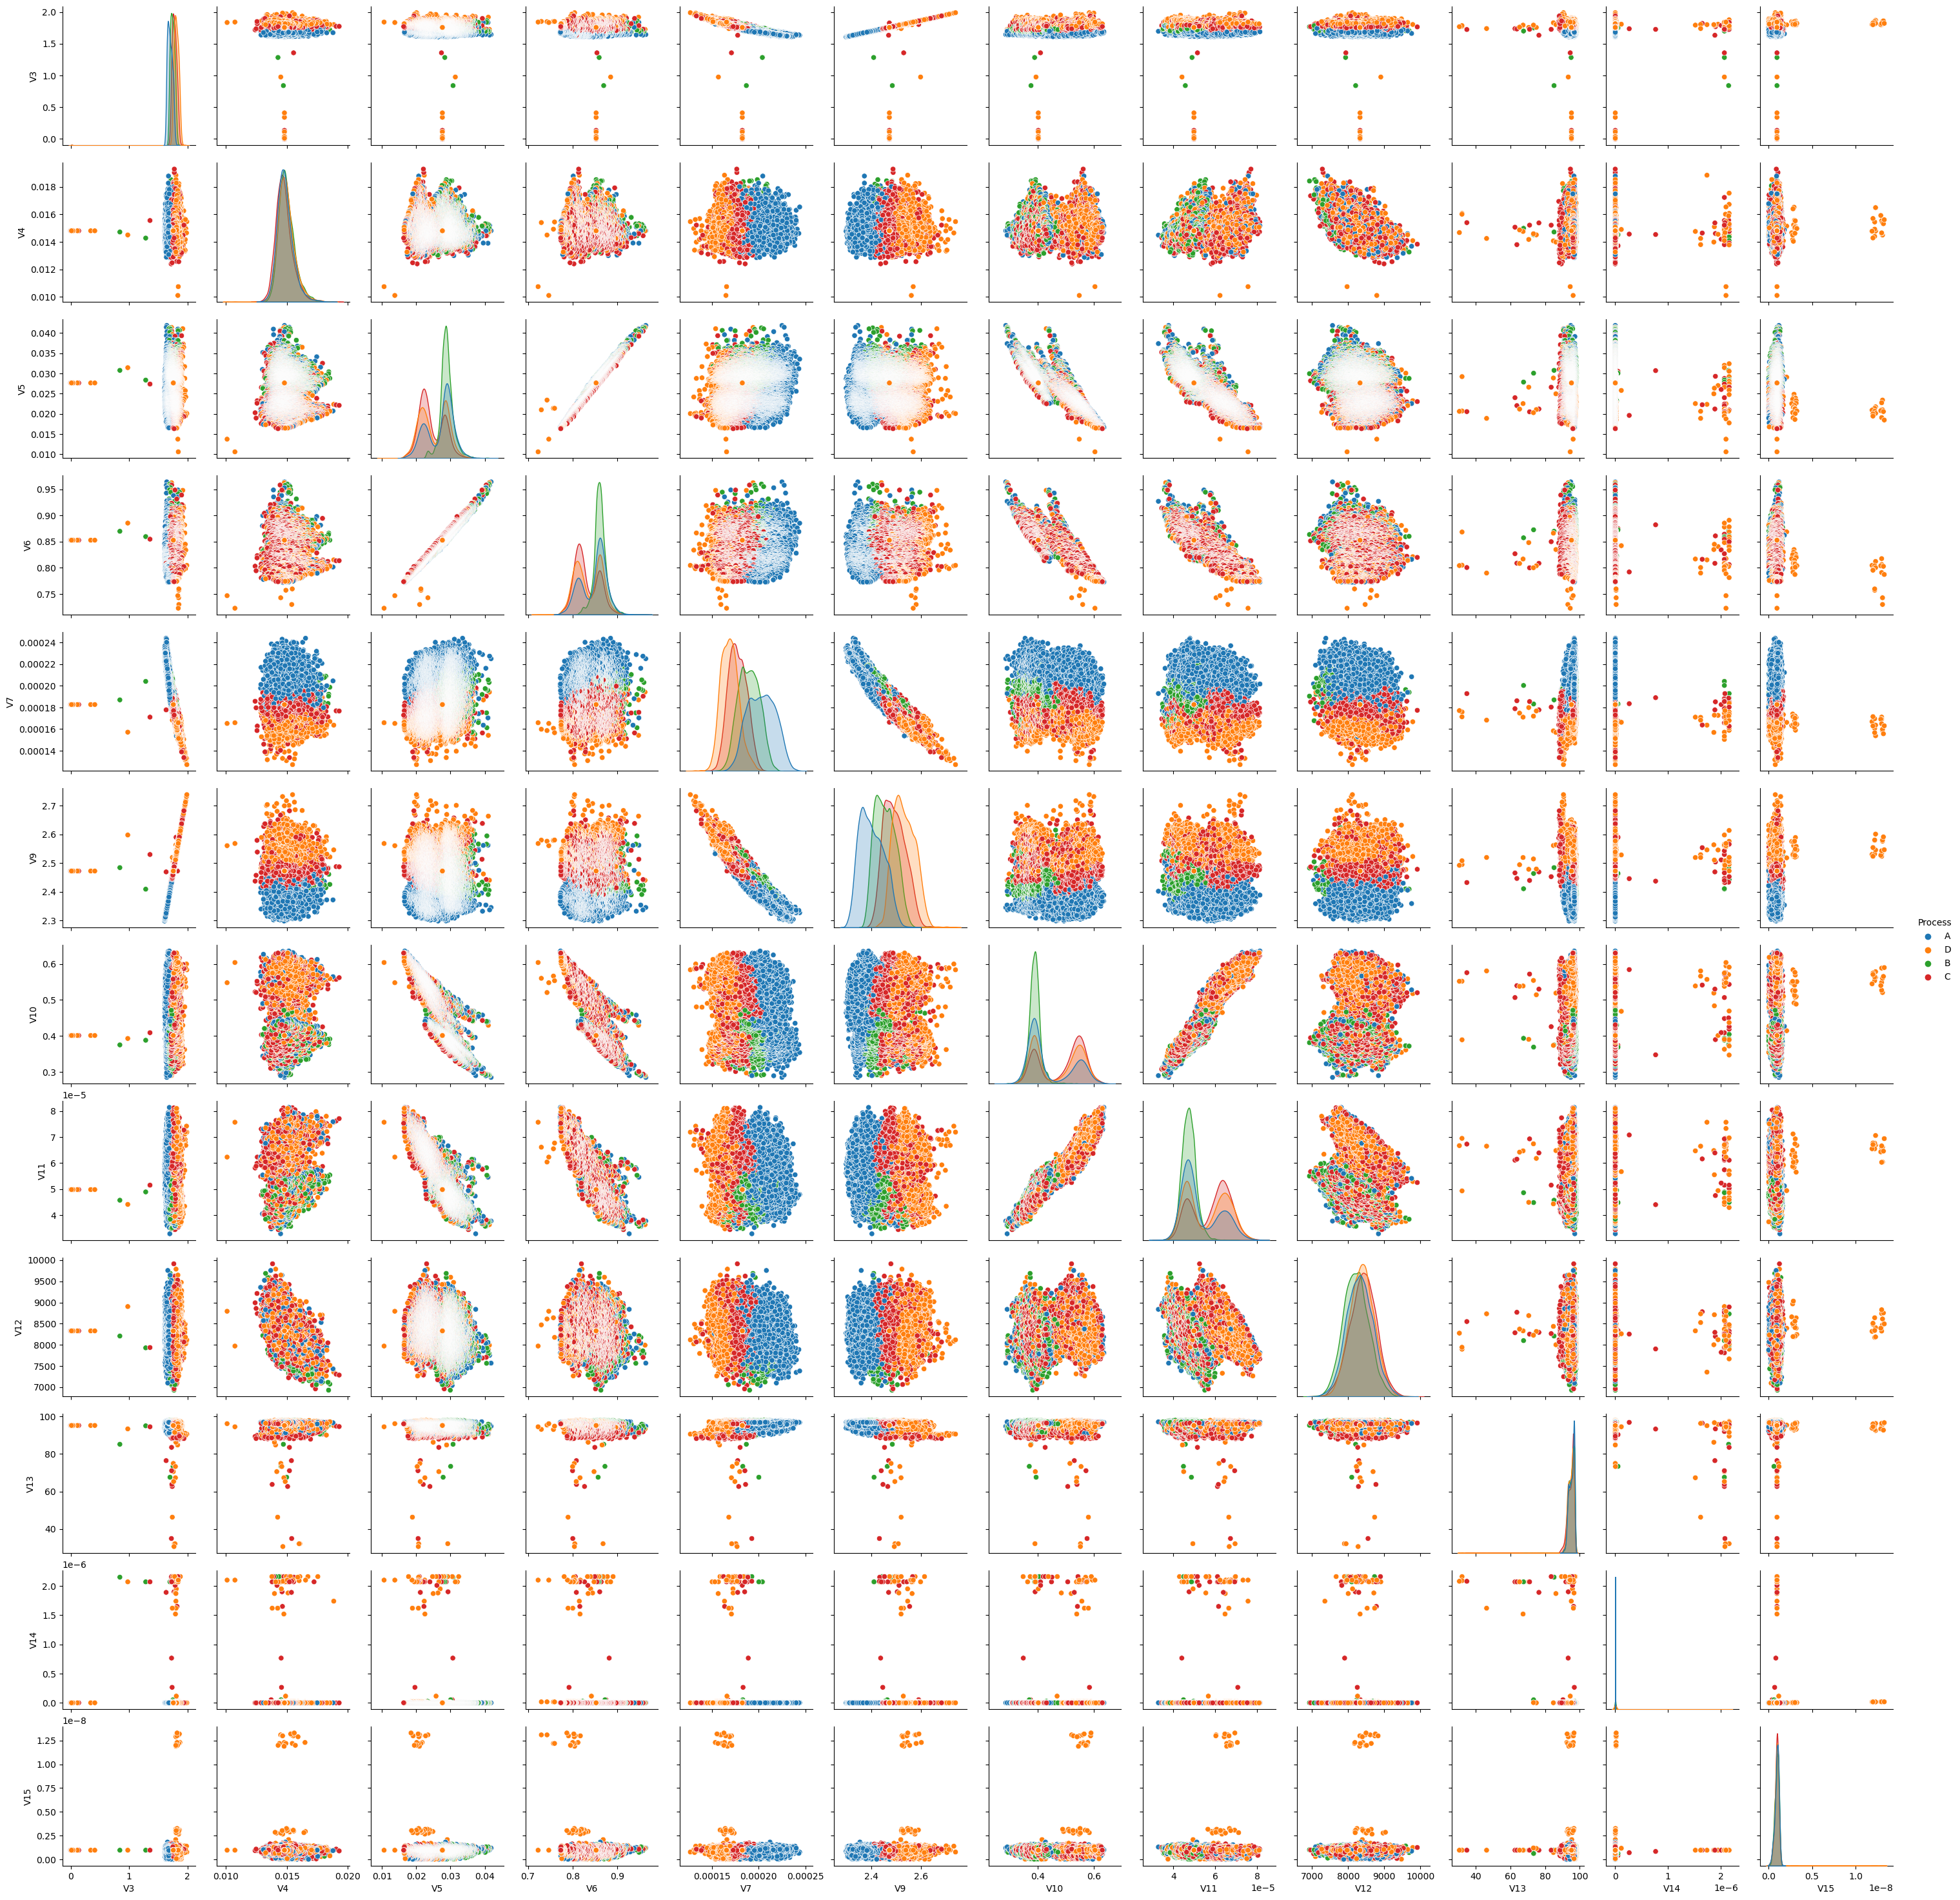

In [268]:
#to cehck the correlation plot grouped by process
sns.pairplot(df, hue = 'Process')
plt.savefig('df corr.jpg')

In [28]:
#to define X and y for test/train split
X = df.drop(['Process'], axis=1)
y = df['Process']

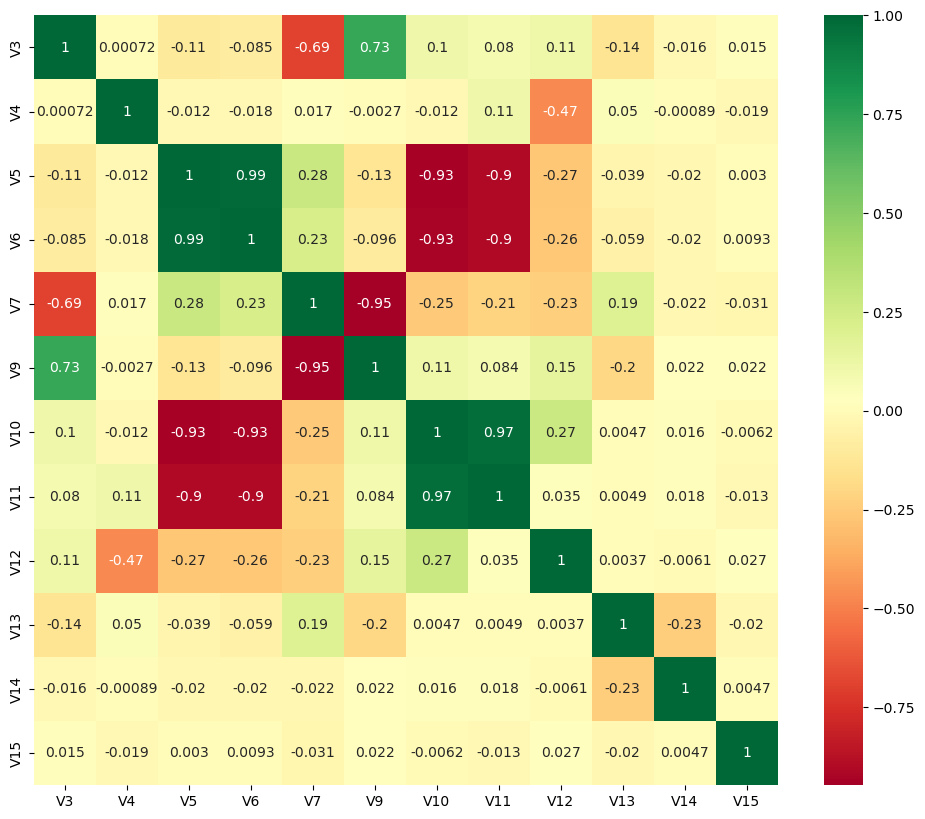

In [29]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(X.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap
plt.savefig('df heatmap.jpg')

In [30]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# check the shape of X_train and X_test
#X_train.shape, X_test.shape
# check data types in y_train and y_test
#y_train.shape, y_test.shape

--------------------------------------------Decission Tree Machine Learning---------------------------------------------------

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier (class_weight='balanced')
param_grid ={
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' :[1,2,3,4],
    'random_state' : [0,42]
}

grid_search = GridSearchCV (dtree,param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}


In [32]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth =  8, min_samples_leaf = 4, min_samples_split= 2, class_weight='balanced')

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       random_state=42)

In [33]:
y_pred_gini = clf_gini.predict(X_test)

In [34]:
y_pred_train_gini = clf_gini.predict(X_train)

In [35]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.10f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Model accuracy score with criterion gini index: 0.6732620321
Training-set accuracy score: 0.7096
Training set score: 0.7096
Test set score: 0.6733


[Text(0.4506578947368421, 0.9444444444444444, 'x[5] <= 2.457\ngini = 0.75\nsamples = 21814\nvalue = [5453.5, 5453.5, 5453.5, 5453.5]'),
 Text(0.17637844611528822, 0.8333333333333334, 'x[5] <= 2.39\ngini = 0.6\nsamples = 8899\nvalue = [4621.525, 2943.82, 1251.327, 76.203]'),
 Text(0.05404135338345865, 0.7222222222222222, 'x[5] <= 2.379\ngini = 0.112\nsamples = 2627\nvalue = [2477.86, 153.634, 3.008, 0.0]'),
 Text(0.015664160401002505, 0.6111111111111112, 'x[5] <= 2.372\ngini = 0.029\nsamples = 2070\nvalue = [2046.317, 30.727, 0.0, 0.0]'),
 Text(0.005012531328320802, 0.5, 'x[5] <= 2.37\ngini = 0.004\nsamples = 1793\nvalue = [1795.42, 3.965, 0.0, 0.0]'),
 Text(0.002506265664160401, 0.3888888888888889, 'gini = 0.0\nsamples = 1701\nvalue = [1707.104, 0.0, 0.0, 0.0]'),
 Text(0.007518796992481203, 0.3888888888888889, 'x[0] <= 1.672\ngini = 0.082\nsamples = 92\nvalue = [88.316, 3.965, 0.0, 0.0]'),
 Text(0.005012531328320802, 0.2777777777777778, 'x[9] <= 95.954\ngini = 0.275\nsamples = 24\nvalu

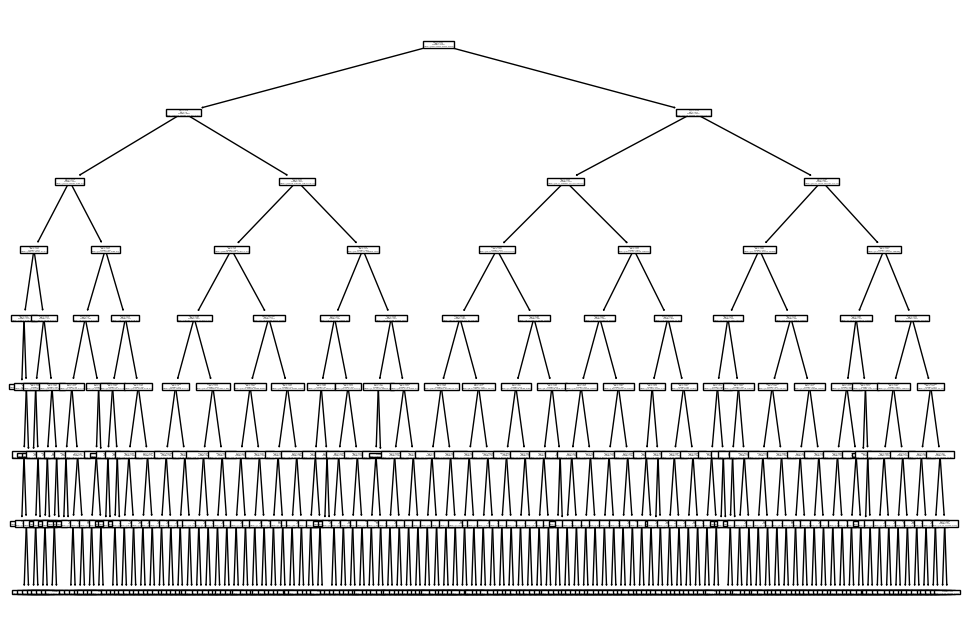

In [36]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

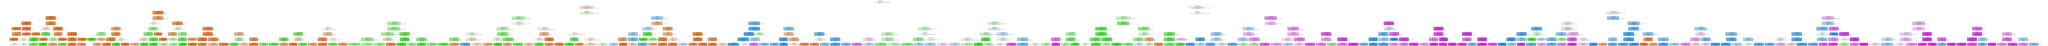

In [37]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph_gini = graphviz.Source(dot_data) 

graph_gini

In [47]:
from sklearn.metrics import confusion_matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)

Text(0.5, 23.52222222222222, 'Predicted label')

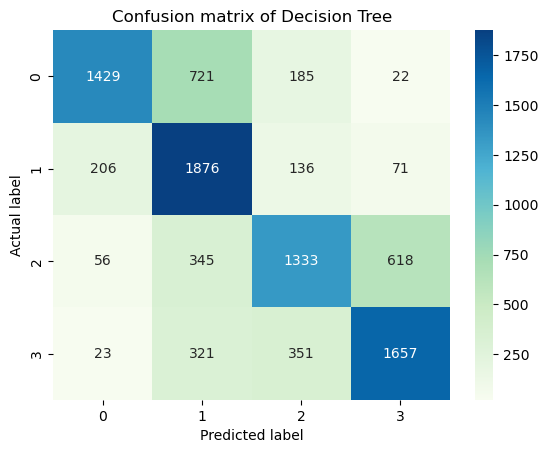

In [63]:
p = sns.heatmap(pd.DataFrame(cm_gini), annot=True,cmap="GnBu", fmt='g')
plt.title('Confusion matrix of Decision Tree', y=1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
from sklearn.metrics import classification_report
print(" Classification report based on Decision Tree")
print(classification_report(y_test, y_pred_gini))

 Classification report based on Decision Tree
              precision    recall  f1-score   support

           A       0.83      0.61      0.70      2357
           B       0.57      0.82      0.68      2289
           C       0.66      0.57      0.61      2352
           D       0.70      0.70      0.70      2352

    accuracy                           0.67      9350
   macro avg       0.69      0.67      0.67      9350
weighted avg       0.69      0.67      0.67      9350



-------------------------------------------------------------SVM Machine Learning-------------------------------------------------

In [40]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [41]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# defining parameter range 
param_grid = {'C': [1000],  
              'gamma': [0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_svm.fit(X_train, y_train) 

print(grid_svm.best_params_)
print(grid_svm.best_estimator_) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.550 total time=  51.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.564 total time=  52.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.574 total time=  51.5s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.560 total time=  49.8s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.563 total time=  53.1s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.560 total time=  32.8s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.569 total time=  42.5s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.588 total time=  36.3s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.556 total time=  32.8s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.582 total time=  34.2s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.526 total time=  29.6s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;,

In [62]:
svm = SVC(kernel='rbf', C=1000, gamma = 0.001)
svm.fit(X_train, y_train)

SVC(C=1000, gamma=0.001)

In [61]:
y_pred_svm = svm.predict(X_test)
y_pred_train_svm = svm.predict(X_train)

In [43]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with svm index: {0:0.10f}'. format(accuracy_score(y_test, y_pred_svm)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_svm)))
print('Training set score: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svm.score(X_test, y_test)))

Model accuracy score with svm index: 0.5722994652
Training-set accuracy score: 0.6133
Training set score: 0.6133
Test set score: 0.5723


In [44]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

Text(0.5, 23.52222222222222, 'Predicted label')

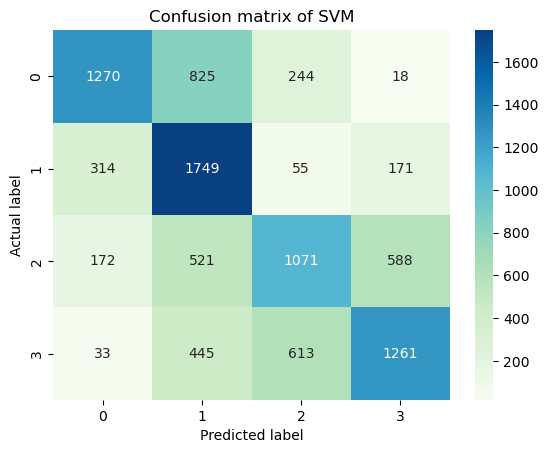

In [60]:
p = sns.heatmap(pd.DataFrame(cm_svm), annot=True,cmap="GnBu", fmt='g')
plt.title('Confusion matrix of SVM', y=1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
print(" Classification report based on SVM")
print(classification_report(y_test, y_pred_svm))

 Classification report based on SVM
              precision    recall  f1-score   support

           A       0.71      0.54      0.61      2357
           B       0.49      0.76      0.60      2289
           C       0.54      0.46      0.49      2352
           D       0.62      0.54      0.57      2352

    accuracy                           0.57      9350
   macro avg       0.59      0.57      0.57      9350
weighted avg       0.59      0.57      0.57      9350



--------------------------------------------------------------------------KNN---------------------------------------------------------------------------

In [52]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}
                   
# with GridSearch
grid_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

grid_KNN.fit(X_train, y_train) 

print(grid_KNN.best_params_)
print(grid_KNN.best_estimator_) 

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 25, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(leaf_size=20, n_neighbors=25, p=1, weights='distance')


In [54]:
knn = KNeighborsClassifier(n_neighbors=25, leaf_size=20, p=1, weights= 'distance',metric ='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=25, p=1, weights='distance')

In [55]:
y_pred_knn = knn.predict(X_test)
y_pred_train_knn = knn.predict(X_train)

In [56]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with svm index: {0:0.10f}'. format(accuracy_score(y_test, y_pred_knn)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_knn)))
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Model accuracy score with svm index: 0.3485561497
Training-set accuracy score: 0.9981
Training set score: 0.9981
Test set score: 0.3486


In [57]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

Text(0.5, 23.52222222222222, 'Predicted label')

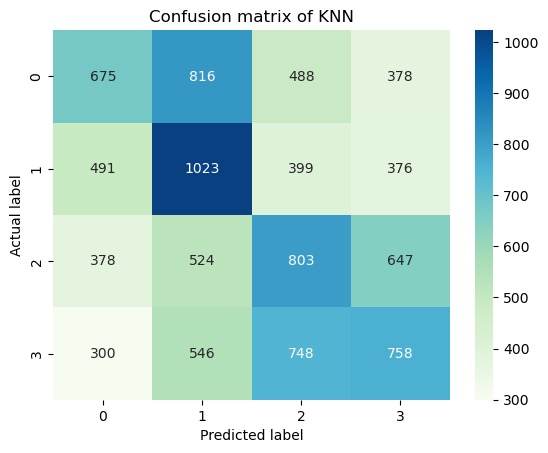

In [59]:
p = sns.heatmap(pd.DataFrame(cm_knn), annot=True,cmap="GnBu", fmt='g')
plt.title('Confusion matrix of KNN', y=1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
print(" Classification report based on KNN")
print(classification_report(y_test, y_pred_knn))

 Classification report based on KNN
              precision    recall  f1-score   support

           A       0.37      0.29      0.32      2357
           B       0.35      0.45      0.39      2289
           C       0.33      0.34      0.34      2352
           D       0.35      0.32      0.34      2352

    accuracy                           0.35      9350
   macro avg       0.35      0.35      0.35      9350
weighted avg       0.35      0.35      0.35      9350



------------------------------------------------------------------------OVERALL-------------------------------------------------------------------------

In [72]:
from sklearn.metrics import classification_report
print(" Classification report based on Decision Tree")
print(classification_report(y_test, y_pred_gini))

print(" Classification report based on SVM")
print(classification_report(y_test, y_pred_svm))

print(" Classification report based on KNN")
print(classification_report(y_test, y_pred_knn))

 Classification report based on Decision Tree
              precision    recall  f1-score   support

           A       0.83      0.61      0.70      2357
           B       0.57      0.82      0.68      2289
           C       0.66      0.57      0.61      2352
           D       0.70      0.70      0.70      2352

    accuracy                           0.67      9350
   macro avg       0.69      0.67      0.67      9350
weighted avg       0.69      0.67      0.67      9350

 Classification report based on SVM
              precision    recall  f1-score   support

           A       0.71      0.54      0.61      2357
           B       0.49      0.76      0.60      2289
           C       0.54      0.46      0.49      2352
           D       0.62      0.54      0.57      2352

    accuracy                           0.57      9350
   macro avg       0.59      0.57      0.57      9350
weighted avg       0.59      0.57      0.57      9350

 Classification report based on KNN
            